# **1-Perform sentiment analysis using Deep Learning**
Exploratory analysis and text processing.

* [I. Text Analysis & Processing](#i-text-analysis-processing)
    - [A. Analysis](#a-text-analysis)
        * [1- Dataset Information](#1-dataset-information)
        * [2- Selecting relevant columns](#2-relevant-columns)
        * [3- Target identification](#3-target)
    - [B. Processing](#b-processing)
        * [1- Cleaned text](#1-cleaned-text)
        * [2- Analysis after cleaning](#2-after-clean)

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import string
import re

from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [145]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
# Version of the libraries used
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))    

numpy - 1.26.3
pandas - 2.2.0
seaborn - 0.13.1
nltk - 3.8.1
re - 2.2.1


You have to downloaded the csv dataset on this link : **https://www.kaggle.com/datasets/kazanova/sentiment140**.

After you have downloaded the csv file you have to put in the folder *data*.

---
<a id='i-text-analysis-processing'></a>
# **I. Text Analysis & Processing**
Text analysis to understand our textual dataset and cleaning for use in future models.

<a id='a-text-analysis'></a>
### **A. Text Analysis**
Exploratory analysis to better understand our data and find the information that will be important and that which can be deleted in the cleaning section.

<a id='1-dataset-information'></a>
**1- Dataset information**    

In [147]:
# Read CSV file
df = pd.read_csv('../data/dataset.csv', encoding='latin1')

In [148]:
# Show first rows of dataframe
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


We see that on all the 6 columns there is the 'Target' and 'Text' column which will be used here.

In [149]:
df.shape

(1599999, 6)

In [150]:
# Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

We have 1.6 million data points and no missing values.

In [151]:
# Show first and last rows of dataframe
display(df.head(3), df.tail(3))

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


<a id='2-relevant-columns'></a>
**2- Selecting relevant columns**   

In [152]:
# Rename column name
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
display(df.head(2))

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


We put the name of the columns that we retrieved from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140).   

In [153]:
df_selected = df[['target', 'text']]
display(df_selected)

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


<a id='3-target'></a>
**3- Target identification**    

In [154]:
df_selected['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

**Caption for the targets :**
- 0 = Negative
- 4 = Positive

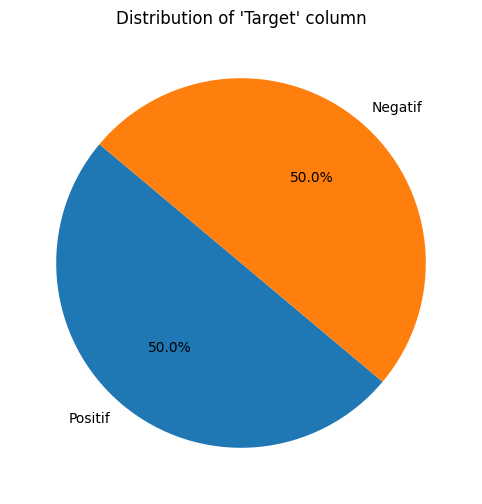

In [155]:
# Calculation of values ​​for each sector
values = df_selected['target'].value_counts()
labels = ['Positif' if label == 4 else 'Negatif' for label in values.index]

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of 'Target' column")
plt.show()

We have balanced classes, 50% positive and 50% negative so we will not need to rebalance the classes.

In [156]:
df_selected['text']

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1599999, dtype: object

In [157]:
# Calculate the number of words in each line
df_selected.loc[:, 'word_count'] = df_selected['text'].apply(lambda x: len(x.split()))

# Calculate the average
average_word_count = df_selected['word_count'].mean()

print(f"The average number of words in each line is {average_word_count}\n")

The average number of words in each line is 13.176146985091865



C:\Users\julia\AppData\Local\Temp\ipykernel_10512\2881711003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'word_count'] = df_selected['text'].apply(lambda x: len(x.split()))


---
<a id='b-processing'></a>
### **B. Processing**
Processing and cleaning to keep text relevant and eliminate noise and unnecessary information.

<a id='1-cleaned-text'></a>
**1- Cleaned text**

In [158]:
display(df_selected)

,target,text,word_count
0,0,is upset that he can't update his Facebook by ...,21
1,0,@Kenichan I dived many times for the ball. Man...,18
2,0,my whole body feels itchy and like its on fire,10
3,0,"@nationwideclass no, it's not behaving at all....",21
4,0,@Kwesidei not the whole crew,5
...,...,...,...
1599994,4,Just woke up. Having no school is the best fee...,11
1599995,4,TheWDB.com - Very cool to hear old Walt interv...,11
1599996,4,Are you ready for your MoJo Makeover? Ask me f...,11
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...,12


In [159]:
def clean_text(df, column):
    # Use nltk stopwords
    stop_words = set(stopwords.words('english'))

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Convert text to lowercase
    df.loc[:, column] = df[column].str.lower()

    # Remove '@' followed by names
    df.loc[:, column] = df[column].str.replace(r'@\w+', '', regex=True)

    # Remove all punctuation
    df.loc[:, column] = df[column].str.translate(str.maketrans('', '', string.punctuation))

    # Remove non-ASCII characters
    df.loc[:, column] = df[column].apply(lambda x: x.encode('ascii', 'ignore').decode())

    # Remove HTTP and HTTPS links
    df.loc[:, column] = df[column].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Remove stopwords and lemmatize the text
    df.loc[:, column] = df[column].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words))

    return df

df_selected = clean_text(df_selected, 'text')

In [160]:
display(df_selected)

,target,text,word_count
0,0,upset cant update facebook texting might cry r...,21
1,0,dived many time ball managed save 50 rest go b...,18
2,0,whole body feel itchy like fire,10
3,0,behaving im mad cant see,21
4,0,whole crew,5
...,...,...,...
1599994,4,woke school best feeling ever,11
1599995,4,thewdbcom cool hear old walt interview httpbli...,11
1599996,4,ready mojo makeover ask detail,11
1599997,4,happy 38th birthday boo alll time tupac amaru ...,12


We clean the text by removing unnecessary words (stopwords), we put the text in lower case, we delete punctuation.

We remove the @ with the names because it doesn't provide information on the negative or positive sentiment of the tweet.

In [161]:
df_selected['target'] = df_selected['target'].replace(4, 1)

C:\Users\julia\AppData\Local\Temp\ipykernel_10512\3741183294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['target'] = df_selected['target'].replace(4, 1)


Replace value 4 to 1, now 0 = negatif and 1 = positif.

In [162]:
# Calculate the number of words in each line
df_selected.loc[:, 'word_count'] = df_selected['text'].apply(lambda x: len(x.split()))

# Calculate the average
average_word_count = df_selected['word_count'].mean()

print(f"The average number of words after cleaning in each line is {average_word_count}")

The average number of words after cleaning in each line is 7.322553326595829


We go from 13 words per line on average to 7, which allows us to divide the size of our text by almost 2 while keeping only the words carrying sentiment information.

In [163]:
df_selected = df_selected.drop('word_count', axis=1)

In [164]:
# Save in csv the text cleaned
df_selected.to_csv('../data/df_clean.csv', index=False)

**(Stemmantizer Testing)**

In [165]:
df_stemm = df[['target', 'text']]

In [166]:
def clean_text_stem(df, column):
    # Use nltk stopwords
    stop_words = set(stopwords.words('english'))

    # Initialize the stemmer
    stemmer = PorterStemmer()

    # Convert text to lowercase
    df.loc[:, column] = df[column].str.lower()

    # Remove '@' followed by names
    df.loc[:, column] = df[column].str.replace(r'@\w+', '', regex=True)

    # Remove all punctuation
    df.loc[:, column] = df[column].str.translate(str.maketrans('', '', string.punctuation))

    # Remove non-ASCII characters
    df.loc[:, column] = df[column].apply(lambda x: x.encode('ascii', 'ignore').decode())

    # Remove HTTP and HTTPS links
    df.loc[:, column] = df[column].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Remove stopwords and stem the text
    df.loc[:, column] = df[column].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split() if word not in stop_words))

    return df

df_stemm = clean_text_stem(df_stemm, 'text')

In [167]:
display(df_stemm)

,target,text
0,0,upset cant updat facebook text might cri resul...
1,0,dive mani time ball manag save 50 rest go bound
2,0,whole bodi feel itchi like fire
3,0,behav im mad cant see
4,0,whole crew
...,...,...
1599994,4,woke school best feel ever
1599995,4,thewdbcom cool hear old walt interview httpbli...
1599996,4,readi mojo makeov ask detail
1599997,4,happi 38th birthday boo alll time tupac amaru ...


<a id='2-after-clean'></a>
**2- Analysis after cleaning**    

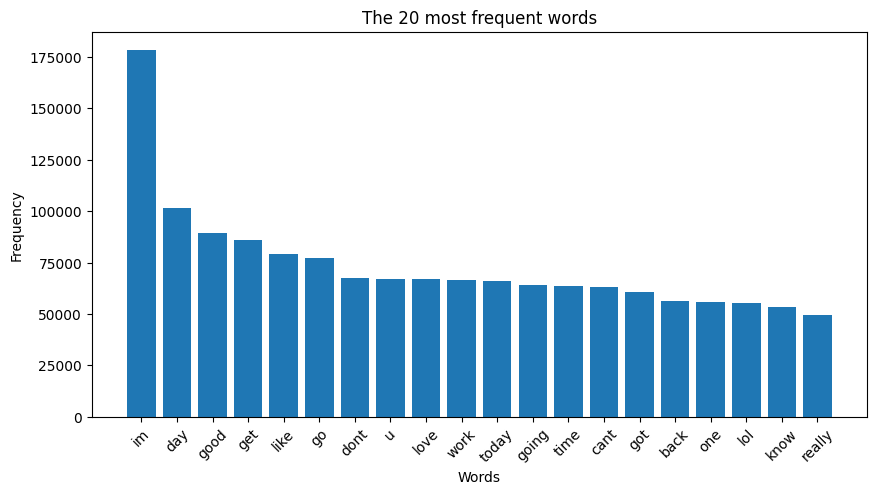

In [168]:
# Create a list of all words in the 'text' column
words = [word for line in df_selected['text'] for word in line.split()]

# Use Counter to get the most frequent words
word_counts = Counter(words)

# Get the 20 most frequent words and their counts
common_words = word_counts.most_common(20)

# Separate words and counts into two lists
words, counts = zip(*common_words)

# Create histogram
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('The 20 most frequent words')
plt.xticks(rotation=45)
plt.show()

We see here by analysis that the words that come out are words that bring a positive feeling, like 'good', 'love' and negative ones like 'cant', 'dont'.

---
---

## **Results**